# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
a = np.linspace(-2,2,100)
b = np.linspace(-2,2,100)
aa, bb = np.meshgrid(a, b)
aa.shape, bb.shape

((100, 100), (100, 100))

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

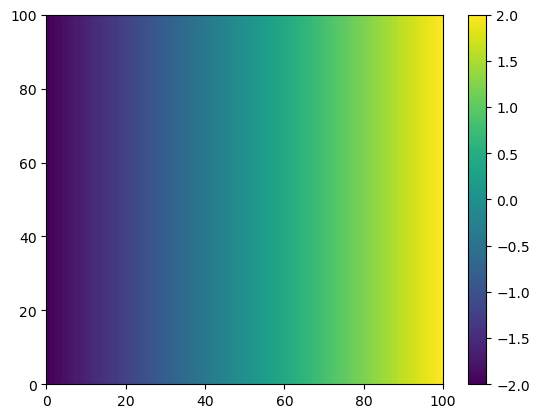

In [3]:
plt.pcolormesh(aa)
plt.colorbar()

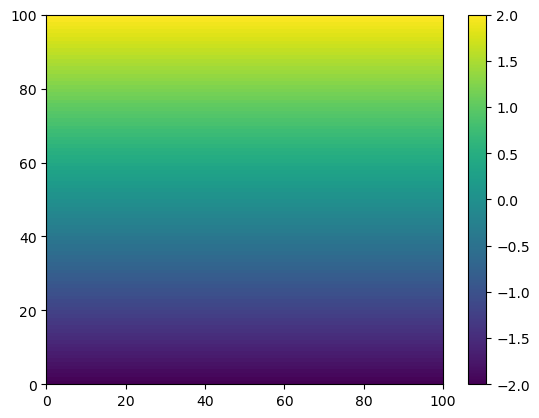

In [4]:
plt.pcolormesh(bb)
plt.colorbar()

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [5]:
r = np.sqrt(aa**2 + bb**2)
phi = np.arctan2(bb,aa)
np.arctan?

Signature:       np.arctan(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'arctan'>
File:            /srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/__init__.py
Docstring:      
arctan(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric inverse tangent, element-wise.

The inverse of tan, so that if ``y = tan(x)`` then ``x = arctan(y)``.

Parameters
----------
x : array_like
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Else

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

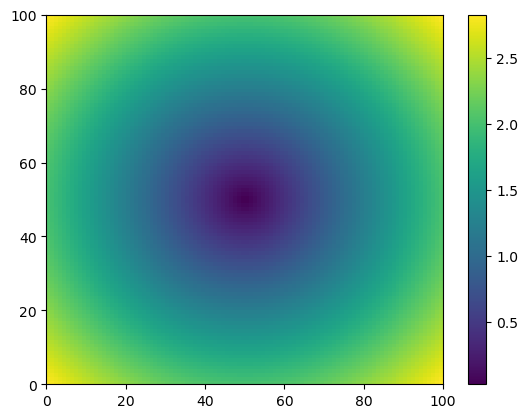

In [6]:
plt.pcolormesh(r)
plt.colorbar()

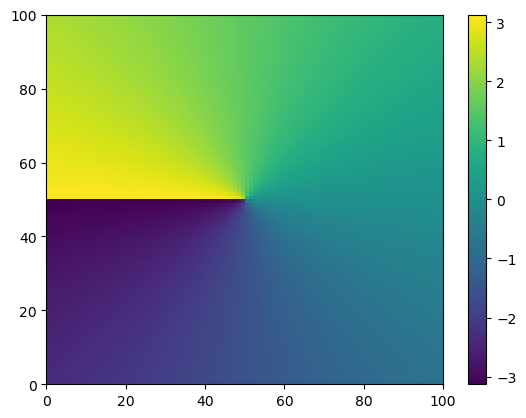

In [7]:
plt.pcolormesh(phi)
plt.colorbar()

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

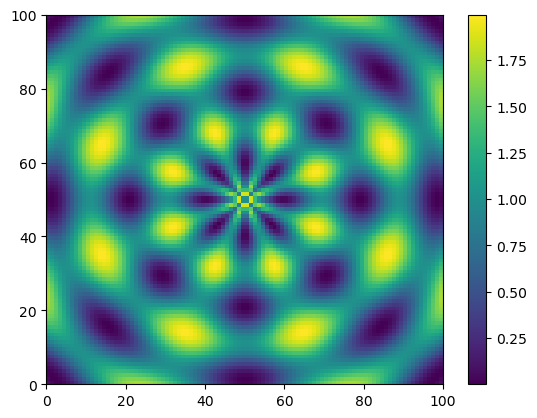

In [8]:
f = (np.cos(4*r))**2 + (np.sin(4*phi))**2
plt.pcolormesh(f)
plt.colorbar()

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

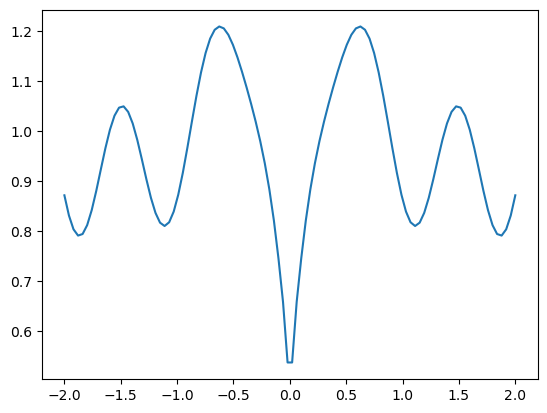

In [9]:
fmean_a = f.mean(axis = 0)
plt.plot(a, fmean_a)

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

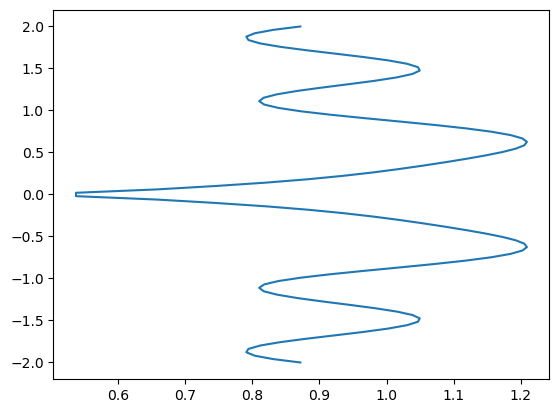

In [48]:
fmean_b = f.mean(axis = 1)
plt.plot(fmean_b, b)

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

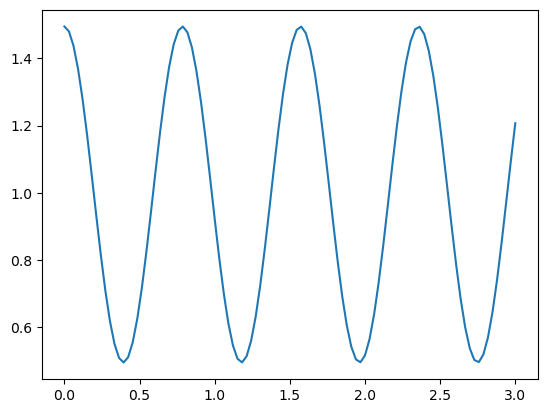

In [49]:
#I need to define a function that returns f from r and phi
def F(r, phi):
    return (np.cos(4*r))**2 + (np.sin(4*phi))**2

#I will define arrays for r and phi
r_array = np.linspace(0,3,100)
phi_array = np.linspace(0,2*np.pi,100)

#Create a function that averages f as a function of r
fmean_r = np.zeros_like(r_array)

#Calculate the mean of f with respect to phi as a function of r
#for i in range(len(r_array)):
    #fmean_r[i] = np.mean(F(r_array[i],phi_array))

# Calculate the mean of F with respect to phi as a function of r
for i in range(len(r_array)):
    f_values = F(r_array[i], phi_array)  
    fmean_r[i] = np.mean(f_values)  

#Plot results
plt.plot(r_array,fmean_r);

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [13]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [14]:
date = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lon = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
lat = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
T = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
level = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [41]:
print(np.shape(T))
print(np.shape(S))
print(np.shape(P))

print(np.shape(lon))
print(np.shape(lat))
print(np.shape(level))
print(np.shape(date))

#Based on the shapes of the arrays, I think that T, S, and P have a level dimension, followed by the T, S, or P data,
#since they all have shapes of (78, 75), and the shape of level is 78.

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(78,)
(75,)


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

Text(0, 0.5, 'Level')

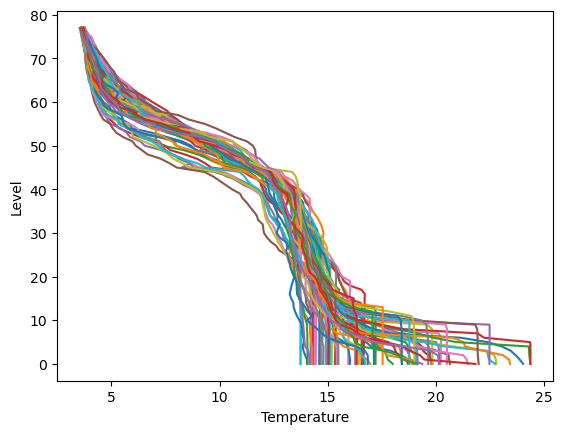

In [16]:
plt.plot(T, level)
plt.xlabel('Temperature')
plt.ylabel('Level')

Text(0, 0.5, 'Level')

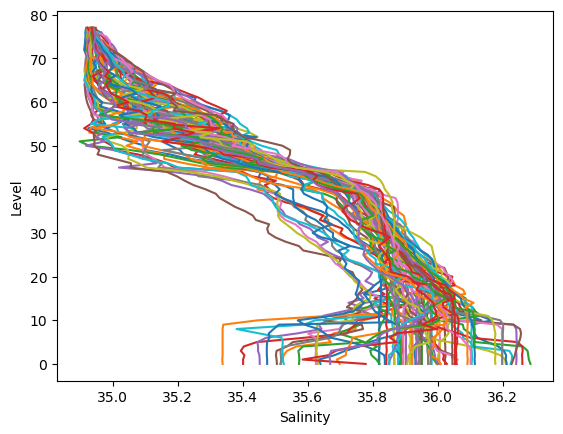

In [17]:
plt.plot(S, level)
plt.xlabel('Salinity')
plt.ylabel('Level')

Text(0, 0.5, 'Level')

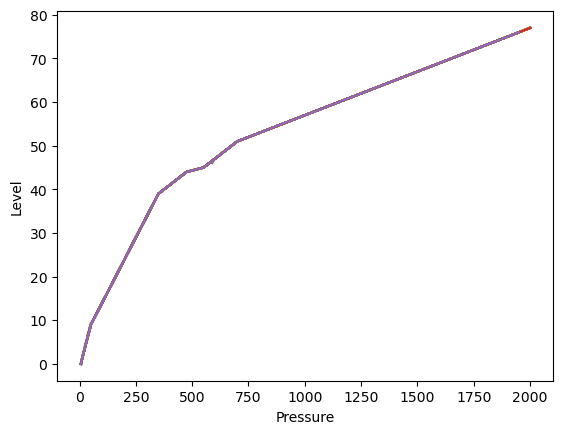

In [26]:
plt.plot(P, level)
plt.xlabel('Pressure')
plt.ylabel('Level')

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [27]:
# Temperature mean
print(T.mean(axis=1).shape)
print(T.mean(axis=1))

# Temperature standard deviation
print(T.std(axis=1).shape)
print(T.std(axis=1))

(78,)
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
(78,)
[       nan        nan        nan        

In [28]:
# Salinity mean
print(S.mean(axis=1).shape)
print(S.mean(axis=1))

# Salinity standard deviation
print(S.std(axis=1).shape)
print(S.std(axis=1))

(78,)
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
(78,)
[       nan        nan        nan      

In [29]:
# Pressure mean
print(P.mean(axis=1).shape)
print(P.mean(axis=1))

# Pressure standard deviation
print(P.std(axis=1).shape)
print(P.std(axis=1))

(78,)
[   6.43466671           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan  575.68400146  600.42400716  625.30800456  650.34533773
  675.33333984  700.37067546  750.42400716  800.36666992  850.38534017
  900.4613387   950.45067383 1000.38534261 1050.38534668 1100.45734212
 1150.45201335 1200.40534505 1250.25067383 1300.49467773 1350.40268392
 1400.41734538 1450.25734212 1500.40267253 1550.46401367           nan


### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


<ErrorbarContainer object of 3 artists>

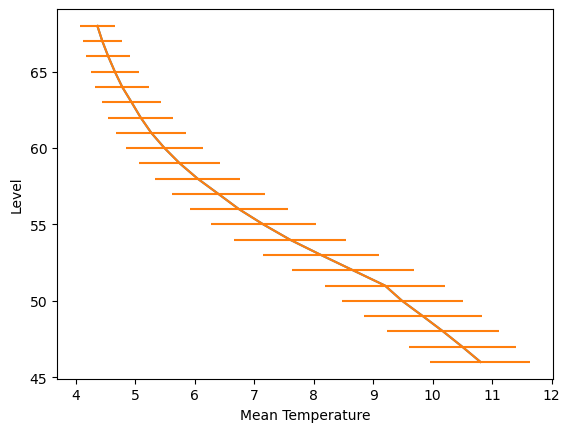

In [30]:
plt.plot(T.mean(axis = 1), level)
plt.xlabel('Mean Temperature')
plt.ylabel('Level')
plt.errorbar(T.mean(axis = 1), level, xerr= T.std(axis=1))

<ErrorbarContainer object of 3 artists>

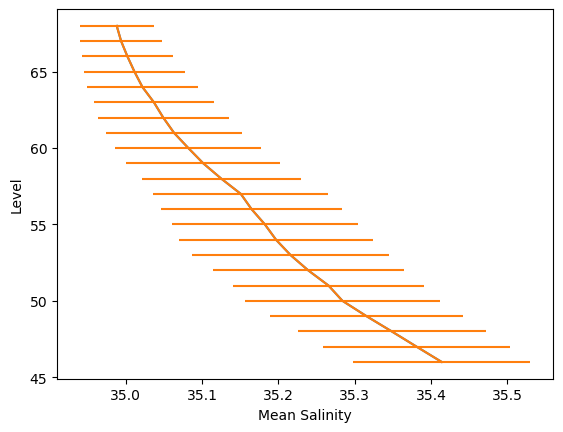

In [23]:
plt.plot(S.mean(axis = 1), level)
plt.xlabel('Mean Salinity')
plt.ylabel('Level')
plt.errorbar(S.mean(axis = 1), level, xerr= S.std(axis=1))

<ErrorbarContainer object of 3 artists>

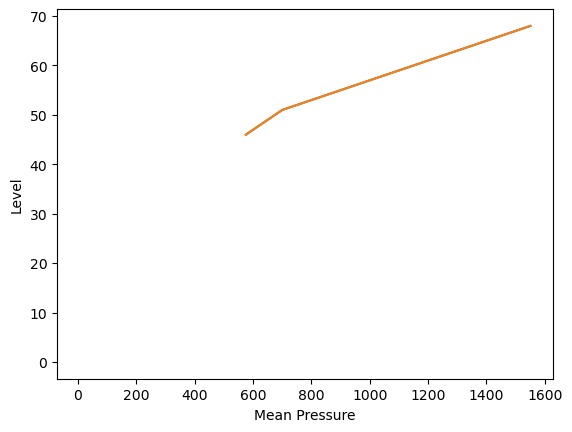

In [31]:
plt.plot(P.mean(axis = 1), level)
plt.xlabel('Mean Pressure')
plt.ylabel('Level')
plt.errorbar(P.mean(axis = 1), level, xerr= P.std(axis=1))

### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
[2.92500898 2.86405591 2.83324563 2.75112353 2.6024842

<ErrorbarContainer object of 3 artists>

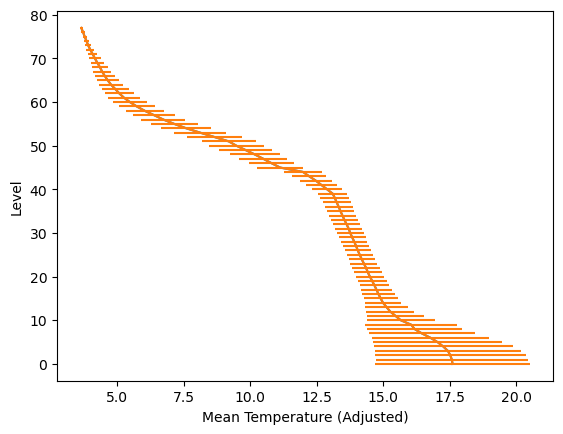

In [35]:
# Temperature mean
print(np.nanmean(T, axis = 1))

# Temperature standard deviation
print(np.nanstd(T, axis = 1))

#Temperature plot
plt.plot(np.nanmean(T, axis = 1), level)
plt.xlabel('Mean Temperature (Adjusted)')
plt.ylabel('Level')
plt.errorbar(np.nanmean(T, axis = 1), level, xerr= np.nanstd(T, axis = 1))

[35.9063218  35.90223138 35.90313435 35.90173139 35.90544583 35.9100359
 35.90946015 35.91343146 35.91967712 35.92615988 35.93195456 35.94055356
 35.94091596 35.93905366 35.93931069 35.93786745 35.93525794 35.93118039
 35.92534328 35.91652257 35.90671895 35.89617843 35.88888019 35.8789927
 35.86946183 35.8598671  35.85061713 35.84211978 35.83150467 35.81969395
 35.80945061 35.80092265 35.79078674 35.77886525 35.76833627 35.75838795
 35.74923783 35.73923559 35.73000444 35.71877237 35.68864513 35.65607159
 35.62678265 35.59231774 35.56205662 35.45401408 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328 34.98008094 34.97214884 34.96517645
 34.95664983 34.9507985  34.9465696  34.94198907 34.93844852 34.93290652]
[0.21775056 0.22181831 0.21880847 0.21661592 0.208425

<ErrorbarContainer object of 3 artists>

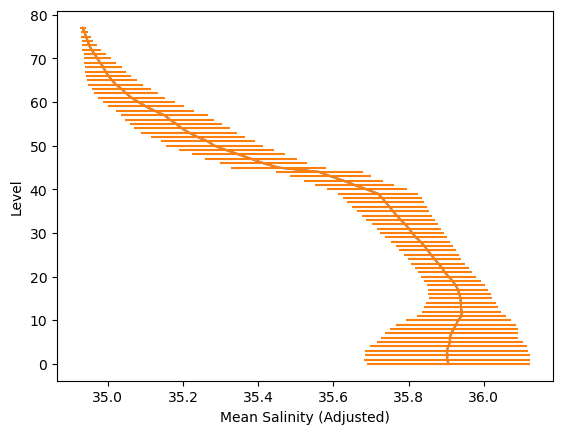

In [36]:
# Salinity mean
print(np.nanmean(S, axis = 1))

# Salinity standard deviation
print(np.nanstd(S, axis = 1))

#Salinity plot
plt.plot(np.nanmean(S, axis = 1), level)
plt.xlabel('Mean Salinity (Adjusted)')
plt.ylabel('Level')
plt.errorbar(np.nanmean(S, axis = 1), level, xerr= np.nanstd(S, axis = 1))

[   6.43466671   10.56891882   15.54246568   20.46301361   25.42567552
   30.44459441   35.44324375   40.4391894    45.40810832   50.37837879
   60.47297323   70.48378413   80.40270347   90.48243311  100.51216311
  110.46081151  120.52702795  130.49459282  140.51216064  150.40540376
  160.40810559  170.36216035  180.41080949  190.4108097   200.39999761
  210.34729499  220.32026858  230.31351224  240.28918808  250.41486297
  260.39999843  270.36891752  280.42432136  290.42297075  300.4229691
  310.46351087  320.50675346  330.5297266   340.41891521  350.49729383
  375.41080867  400.3797294   425.29864626  450.38378205  475.30675403
  550.47703016  575.68400146  600.42400716  625.30800456  650.34533773
  675.33333984  700.37067546  750.42400716  800.36666992  850.38534017
  900.4613387   950.45067383 1000.38534261 1050.38534668 1100.45734212
 1150.45201335 1200.40534505 1250.25067383 1300.49467773 1350.40268392
 1400.41734538 1450.25734212 1500.40267253 1550.46401367 1600.44055011
 1650.3

<ErrorbarContainer object of 3 artists>

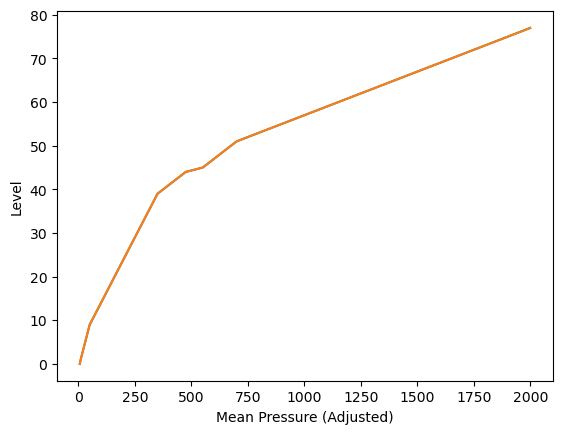

In [37]:
# Pressure mean
print(np.nanmean(P, axis = 1))

# Pressure standard deviation
print(np.nanstd(P, axis = 1))

#Pressure plot
plt.plot(np.nanmean(P, axis = 1), level)
plt.xlabel('Mean Pressure (Adjusted)')
plt.ylabel('Level')
plt.errorbar(np.nanmean(P, axis = 1), level, xerr= np.nanstd(P, axis = 1))

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

Text(0, 0.5, 'Latitude')

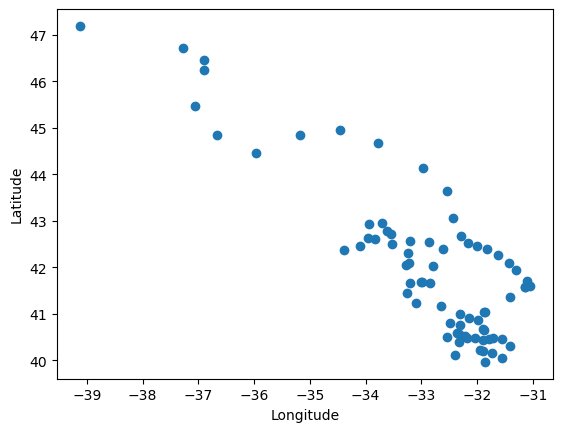

In [39]:
plt.scatter(lon, lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')